<a href="https://colab.research.google.com/github/obifarin/the-epsilon/blob/main/01_machine_learning_primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supplementary code for `Machine Learning Primer`

https://theepsilon.substack.com/p/machine-learning-primer

## Model Fitting

In [ ]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Use the xkcd style
plt.xkcd()
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

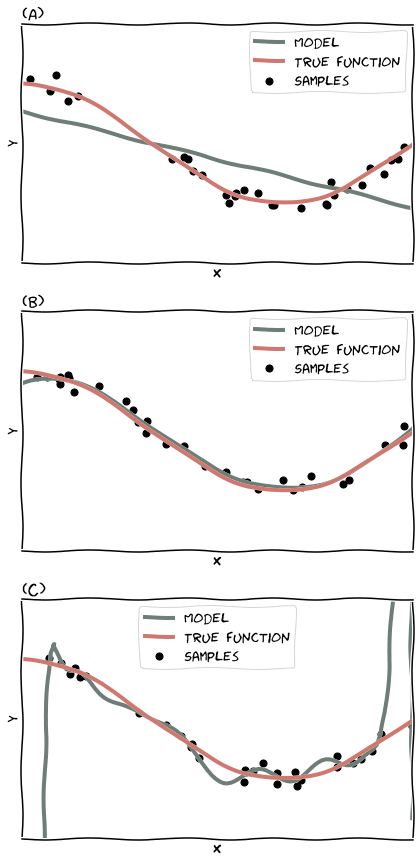

In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30

degrees = [1, 4, 17]
plt.figure(figsize=(7, 15))
fig_id = ['(A)', '(B)', '(C)'] # new color codes

for i in range(len(degrees)):
    ax = plt.subplot(len(degrees), 1, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1

    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross-validation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)

    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]),
             label="Model", color='#6E7D75', linewidth=4)
    plt.plot(X_test, true_fun(X_test), label="True function",
             color='#CE7870', linewidth=4)
    plt.scatter(X, y, color='#000000', s=50, label="Samples") #edgecolor
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")

    plt.title(fig_id[i], loc = 'left')


    #plt.title(
    #    "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
    #        degrees[i], -scores.mean(), scores.std()))

#plt.savefig('ml.svg')
plt.show()


Code adapted from [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

## Inductive  Bias

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

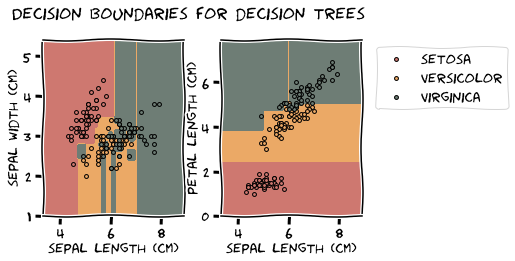

In [ ]:
# Load the iris dataset
iris = load_iris()

# Define some parameters
n_classes = 3
plot_colors = ['#CE7870', '#EBA966', '#6E7D75'] # new color codes
boundary_colors = ['#CE7870', '#EBA966', '#6E7D75']
#plot_step = 0.02

# Loop through all pairs of features
for pairidx, pair in enumerate([[0, 1], [0, 2]]):

    # Extract the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train a decision tree classifier
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(1, 2, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=ListedColormap(boundary_colors),
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=ListedColormap(boundary_colors),
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision boundaries for decision trees")
# Add a legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.axis("tight")

#plt.savefig('DT.svg')
plt.show()


Code adapted from [here](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html)